In [56]:
import pandas as pd
import numpy as np
import os

%matplotlib inline

In [57]:
df = pd.read_csv('percentage1.csv')
df.head()

Year  Albania.GDP  Albania.Pop  Algeria.GDP  Algeria.Pop  Andorra.GDP  \
0  1990     0.029625     0.062086     0.498939     0.482064     0.004411   
1  1991     0.021137     0.060691     0.488514     0.485522     0.004483   
2  1992     0.019371     0.059358     0.491048     0.488976     0.004467   
3  1993     0.020916     0.058079     0.473781     0.492274     0.004357   
4  1994     0.022071     0.056849     0.457453     0.495148     0.004347   

   Andorra.Pop  Angola.GDP  Angola.Pop  AntiguaandBarbuda.GDP  ...  \
0     0.001012    0.144044    0.223456               0.002228  ...   
1     0.001030    0.144162    0.227188               0.002256  ...   
2     0.001047    0.134037    0.230930               0.002254  ...   
3     0.001065    0.100416    0.234639               0.002338  ...   
4     0.001082    0.099147    0.238597               0.002430  ...   

   Uruguay.GDP  Uruguay.Pop  Uzbekistan.GDP  Uzbekistan.Pop  Vanuatu.GDP  \
0     0.073401     0.058884        0.130895        0.387456     0.000770   
1     0.075314     0.058250        0.129078        0.389251     0.000787   
2     0.080265     0.057652        0.113179        0.392101     0.000797   
3     0.081206     0.057079        0.108976        0.394872     0.000792   
4     0.084880     0.056538        0.100654        0.396604     0.000841   

   Vanuatu.Pop  VietNam.GDP  VietNam.Pop  Zambia.GDP  Zambia.Pop  
0     0.002850     0.270966     1.264053    0.031649    0.145205  
1     0.002874     0.284533     1.269987    0.031353    0.146405  
2     0.002899     0.305243     1.275782    0.030422    0.147604  
3     0.002925     0.325111     1.280904    0.032020    0.148845  
4     0.002952     0.344756     1.284989    0.028506    0.150195  

[5 rows x 357 columns]

In [58]:
gdp = pd.merge(df.Year,df[df.columns[1::2]],left_index=True, right_index=True)
gdp = gdp.melt(id_vars = ['Year'], value_vars = gdp.columns.drop('Year').tolist()).rename({'variable' : 'Country', 'value': 'GDP'}, axis=1)
pop = df[df.columns[::2]]
pop = pop.melt(id_vars = ['Year'], value_vars = pop.columns.drop('Year').tolist()).rename({'variable' : 'Country', 'value': 'Population'}, axis=1)

def fix_Country(x):
    return x.split('.')[0].strip()

pop['Country'] = pop['Country'].apply(fix_Country)
gdp['Country'] = gdp['Country'].apply(fix_Country)

complete_df = pd.merge(gdp, pop, left_on = ['Year', 'Country'], right_on = ['Year', 'Country'])
complete_df["GDP"] = pd.to_numeric(complete_df["GDP"], errors='coerce')
complete_df["Population"] = pd.to_numeric(complete_df["Population"], errors='coerce')
complete_df

Year  Country       GDP  Population
0     1990  Albania  0.029625    0.062086
1     1991  Albania  0.021137    0.060691
2     1992  Albania  0.019371    0.059358
3     1993  Albania  0.020916    0.058079
4     1994  Albania  0.022071    0.056849
...    ...      ...       ...         ...
6067  2018   Zambia  0.044787    0.232809
6068  2019   Zambia  0.044152    0.237390
6069  2020   Zambia  0.044198    0.242003
6070  2021   Zambia  0.044133    0.246840
6071  2022   Zambia  0.044965    0.251744

[6072 rows x 4 columns]

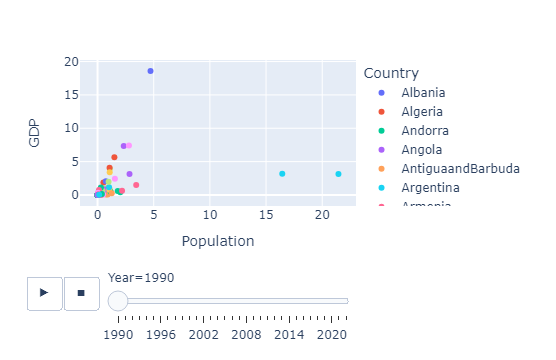

In [59]:
fig = px.scatter(complete_df, x="Population", y="GDP", animation_frame="Year", color="Country", hover_name="Country")
fig.show()

In [55]:
fig.write_html("file.html")